# Sales Analysis
## Convert separate sales data into one combined file 

In [ ]:
import os
import pandas as pd

path = r"C:\vscode\active\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data"

files = [file for file in os.listdir(path)]
data = pd.concat([pd.read_csv(path + "\\" + file) for file in files])
data.to_csv(r"C:\vscode\active\Pandas-Data-Science-Tasks\SalesAnalysis\combined_data.csv", index=False)

## read the combined csv file 


In [ ]:
combined_data = pd.read_csv("combined_data.csv")
print(combined_data.head())
print(combined_data.info())
print(combined_data.describe())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          1863

## Print the unique values for each column so that I can eye ball some apparent issues

In [ ]:
print(combined_data["Product"].unique())
print(combined_data["Quantity Ordered"].unique())
print(combined_data["Price Each"].unique())

['USB-C Charging Cable' nan 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor' 'Product']
['2' nan '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']
['11.95' nan '99.99' '600' '11.99' '1700' '14.95' '389.99' '3.84' '150'
 '2.99' '700' '300' '149.99' '109.99' '600.0' '999.99' '400' '379.99'
 'Price Each' '700.0' '1700.0' '150.0' '300.0' '400.0']


**there are nan and 'quantity ordered' and 'price each' are not int**
## Drop Nan and change data to specific types

In [5]:
combined_data = combined_data.dropna(how='all')
combined_data = combined_data[combined_data["Quantity Ordered"].str.isnumeric()]
combined_data["Quantity Ordered"] = combined_data["Quantity Ordered"].astype(int)
combined_data["Price Each"] = combined_data["Price Each"].astype(float)
combined_data["Price Each"] = combined_data["Price Each"].round()
combined_data["Price Each"] = combined_data["Price Each"].astype(int)
combined_data["Order Date"] = pd.to_datetime(combined_data["Order Date"])


C:\Users\heche\AppData\Local\Temp\ipykernel_3364\546897770.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data["Order Date"] = pd.to_datetime(combined_data["Order Date"])


## Add additional columns to increase the capability of the table

In [ ]:

combined_data["Month"] = combined_data["Order Date"].dt.month

combined_data["State"] = combined_data["Purchase Address"].str.split(" ").str[-2]

print(combined_data.head())
print(combined_data.info())


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2          12   
2   176559  Bose SoundSport Headphones                 1         100   
3   176560                Google Phone                 1         600   
4   176560            Wired Headphones                 1          12   
5   176561            Wired Headphones                 1          12   

           Order Date                      Purchase Address  Month State  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4    TX  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4    MA  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4    CA  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4    CA  
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4    CA  
<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column 

## Q1 What was the best month for sales? How much was earned that month?

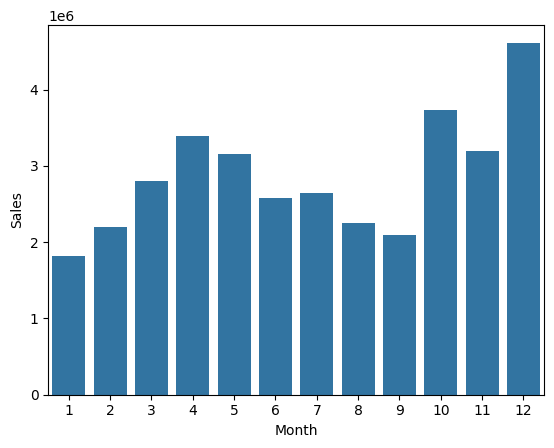

the month with the hightest sale is: 12 with a total sale of: 4614482


In [7]:
#step 5 import the visualization library and plot the data

import matplotlib.pyplot as plt
import seaborn as sns

#step 6 create a column that contains the sales for each order 

combined_data["Sales"] = combined_data["Quantity Ordered"] * combined_data["Price Each"]

# find out the total sales for each month

sales_by_month = combined_data.groupby("Month")["Sales"].sum().reset_index()

# plot the sales by month

sns.barplot(x="Month", y="Sales", data=sales_by_month)
plt.show()

print("the month with the hightest sale is: " + str(sales_by_month["Month"][sales_by_month["Sales"].idxmax()]) + " with a total sale of: " + str(sales_by_month["Sales"].max()))

## which city sold the most products?

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2          12   
2   176559  Bose SoundSport Headphones                 1         100   
3   176560                Google Phone                 1         600   
4   176560            Wired Headphones                 1          12   
5   176561            Wired Headphones                 1          12   

           Order Date                      Purchase Address  Month State  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4    TX   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4    MA   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4    CA   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4    CA   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4    CA   

   Sales          City  
0     24        Dallas  
2    100        Boston  
3    600   Los Angeles  
4     12  

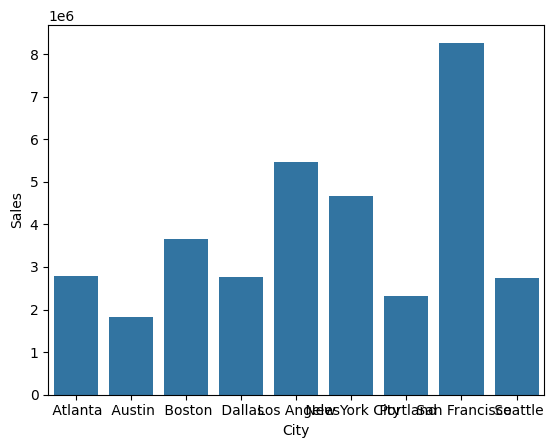

the city with the hightest sale is:  San Francisco with a total sale of: 8264049
the city with the most products sold is:  San Francisco with a total sale of: 50239


In [ ]:

combined_data['City'] = combined_data['Purchase Address'].str.split(',').str[-2]
print(combined_data.head())

sales_by_city = combined_data.groupby('City')['Sales'].sum().reset_index()
products_by_city = combined_data.groupby('City')['Quantity Ordered'].sum().reset_index()


sns.barplot(x='City', y='Sales', data=sales_by_city)
plt.show()

print("the city with the hightest sale is: " + str(sales_by_city['City'][sales_by_city['Sales'].idxmax()]) + " with a total sale of: " + str(sales_by_city['Sales'].max()))

#print the city with the most number of products sold  

print("the city with the most products sold is: " + str(products_by_city['City'][products_by_city['Quantity Ordered'].idxmax()]) + " with a total sale of: " + str(products_by_city['Quantity Ordered'].max()))


## What time should we display advertisemens to maximize the likelihood of customer’s buying product?


<class 'pandas.core.frame.DataFrame'>


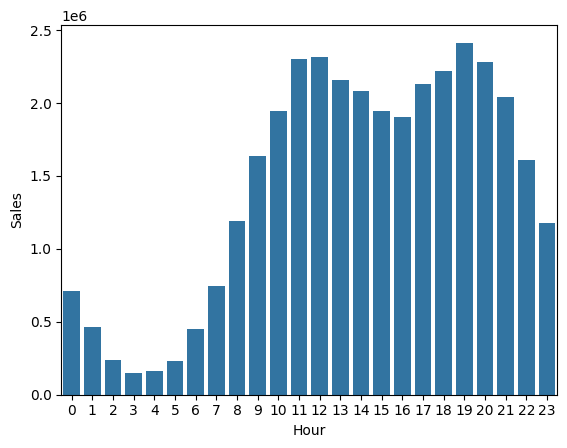

In [ ]:

#in terms of month Oct to Dec is a good time based on prior analysis 

#next we want to understand the hour when customer orderred the procuct 

combined_data['Hour'] = combined_data['Order Date'].dt.hour.astype(int)
sales_by_hour = combined_data.groupby('Hour')['Sales'].sum().reset_index()

sns.barplot(data = sales_by_hour, x = 'Hour', y='Sales')
plt.show()

#we should display the adverisement from 11 am to 8 pm 

## What products are most often sold together?


In [ ]:

df = combined_data[combined_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\heche\AppData\Local\Temp\ipykernel_3364\2275093275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [26]:
sales_by_product = combined_data.groupby('Product')['Sales'].sum().reset_index()
print("the product with the hightest sale is: " + str(sales_by_product['Product'][sales_by_product['Sales'].idxmax()]) + " with a total sale of: " + str(sales_by_product['Sales'].max()))


the product with the hightest sale is: Macbook Pro Laptop with a total sale of: 8037600
